<a href="https://colab.research.google.com/github/Prajitata/Face_mask_detection_using_CNN_model/blob/main/FACE_MASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
from google.colab import files
import zipfile
import os

#Uploading ZIP file
uploaded = files.upload()

# Unzipping it
zip_filename = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('data')

# Show extracted structure
print("Extracted folders:", os.listdir("data"))

Saving archive.zip to archive (2).zip
Extracted folders: ['archive']


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 150
BATCH_SIZE = 32

# Enhanced training augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Validation/test data should NOT be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    "data/archive/data/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_gen = test_datagen.flow_from_directory(
    "data/archive/data/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)







Found 6058 images belonging to 2 classes.
Found 1495 images belonging to 2 classes.


In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),

]

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 945ms/step - accuracy: 0.7302 - loss: 0.5485

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


190/190 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.7305 - loss: 0.5480 - val_accuracy: 0.8916 - val_loss: 0.2816
Epoch 2/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.8411 - loss: 0.3549 - val_accuracy: 0.7766 - val_loss: 0.4092
Epoch 3/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 198s 994ms/step - accuracy: 0.8689 - loss: 0.3111 - val_accuracy: 0.8261 - val_loss: 0.3745
Epoch 4/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.8778 - loss: 0.2843 - val_accuracy: 0.9184 - val_loss: 0.2086
Epoch 5/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 189s 995ms/step - accuracy: 0.9109 - loss: 0.2273 - val_accuracy: 0.8535 - val_loss: 0.3131
Epoch 6/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 189s 994ms/step - accuracy: 0.9208 - loss: 0.2154 - val_accuracy: 0.8936 - val_loss: 0.2376
Epoch 7/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 188s 990ms/step - accuracy: 0.9366 - loss: 0.1727 - val_accuracy: 0.9030 - val_loss: 0.2367
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 290ms/step - accuracy: 0.9167 - loss: 0.2231
Test Accuracy: 0.918

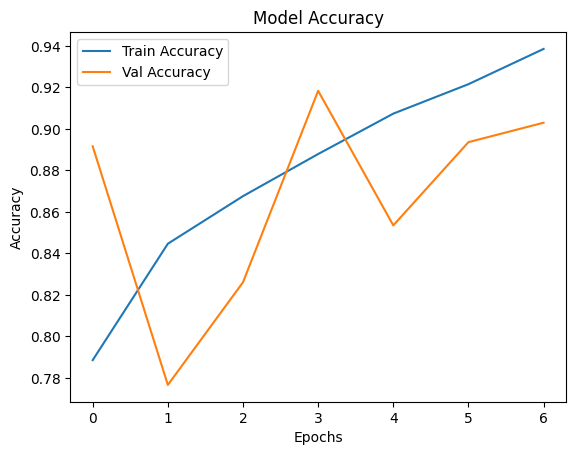

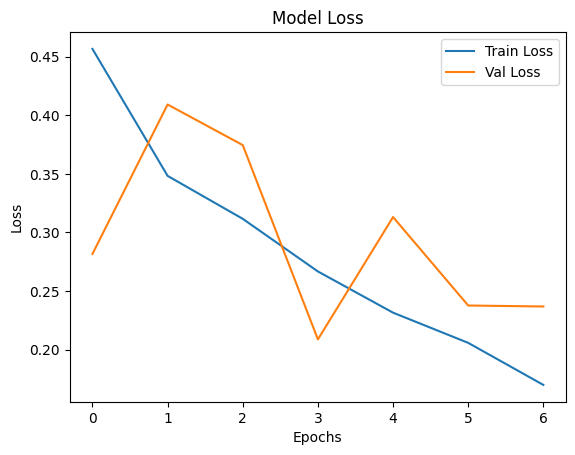

In [17]:
# Train the model
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=10,
    callbacks=callbacks
)

loss, acc = model.evaluate(test_gen)
print(f"Test Accuracy: {acc:.4f}")
print(f"Test Loss: {loss:.4f}")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,691,141 (109.45 MB)

 Trainable params: 9,563,713 (36.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,127,428 (72.97 MB)

In [18]:
model.save("face_mask_model.h5")

In [19]:
from tensorflow.keras.models import load_model
model = load_model("face_mask_model.h5")
